# MNIST grayscale

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 18s 2us/step


## Preprocessing

In [6]:
x_train.shape

(60000, 28, 28)

In [10]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [21]:
# We don't use scaler from skelarn because we can assume that images only range from 0 - 255
# So we could just divide all the number with 255 
# We know that images only have constant range
x_train = x_train/255
x_test = x_test/255

In [24]:
# We then reshape the image to be 1 channel color for CNN to understand that we deal with grayscale image
# (batch_size,width,height,color_channels)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

## Training and model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [30]:
# filters -> more complex the image has or has complex pattern, you could do more filters
# kernel_size -> it's good that you specify the kernel_size with power of 2
# strides -> it is the way kernel / window slide into another pixel, ex: 28/4=7 so using stride (1,1) is ok coz it can slide through it without overflow
# padding -> valid when you know that the kernel and stride not overflowing, same when you need to pad it automatically
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [33]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1370 - accuracy: 0.9585 - val_loss: 0.0581 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0386 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0413 - val_accuracy: 0.9871


## Evaluation

In [34]:
metrics = pd.DataFrame(model.history.history)

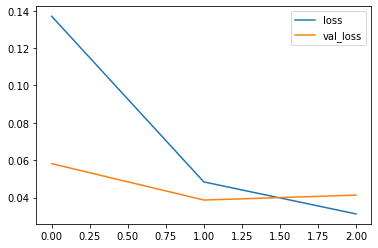

In [36]:
metrics[['loss','val_loss']].plot()

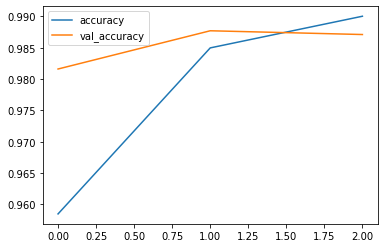

In [37]:
metrics[['accuracy','val_accuracy']].plot()

In [39]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04128824919462204, 0.9871000051498413]

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [57]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    1,    0,    0,    0,    0,    1,    1],
       [   0, 1124,    2,    4,    0,    2,    2,    0,    1,    0],
       [   1,    0, 1020,    5,    0,    0,    0,    4,    2,    0],
       [   0,    0,    3, 1003,    0,    2,    0,    0,    2,    0],
       [   0,    0,    1,    0,  961,    0,    1,    1,    2,   16],
       [   1,    0,    0,   10,    0,  878,    2,    0,    1,    0],
       [   6,    1,    0,    2,    1,    3,  942,    0,    3,    0],
       [   1,    1,    7,    5,    0,    0,    0, 1009,    2,    3],
       [   6,    0,    2,    1,    0,    1,    0,    0,  959,    5],
       [   1,    1,    0,    1,    1,    1,    0,    4,    2,  998]])

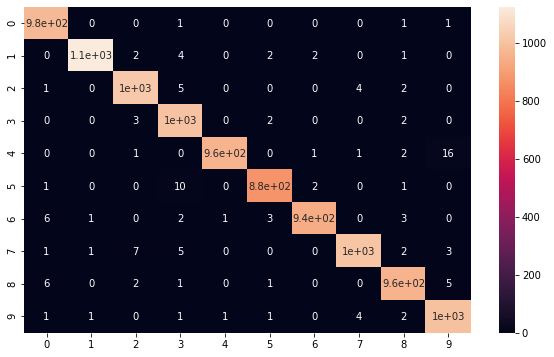

In [63]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [46]:
pred = pd.Series(predictions)
y_true = pd.Series(y_test)

In [53]:
pred_df = pd.concat([pred,y_true],axis=1)
pred_df.columns = ['Predictions','True label']

In [55]:
pred_df

,Predictions,True label
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


## Testing

In [64]:
my_number = x_test[7]

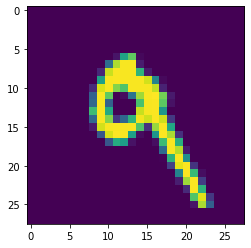

In [67]:
plt.imshow(my_number.reshape(28,28))

In [68]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([9])